In [22]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("/Users/tongzhang/Downloads/lending-club-loan-data/database.sqlite")
print(conn)
df = pd.read_sql_query("""SELECT open_acc, AVG(loan_amnt) avg_loan_amnt
FROM loan
WHERE addr_state LIKE  'CA'
GROUP BY open_acc;""", conn)
df

,open_acc,avg_loan_amnt
0,0.0,8000.000000
1,1.0,9950.675676
2,2.0,10066.327519
3,3.0,10470.874066
4,4.0,11203.548348
5,5.0,12047.147898
6,6.0,12777.227532
7,7.0,13406.330034
8,8.0,13832.264683
9,9.0,14272.353548


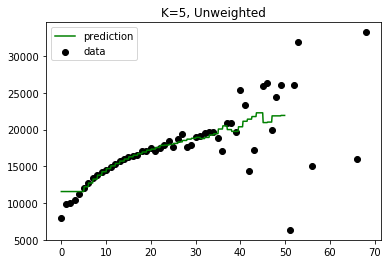

In [24]:
# KNN Regression
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = np.array(df['open_acc']).reshape(-1, 1)
Y = np.array(df['avg_loan_amnt']) 
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Unweighted')
plt.show()

Coefficients: [ 208.01557147]
Intercept: 12079.2798965
R-Squared: 0.47121785974


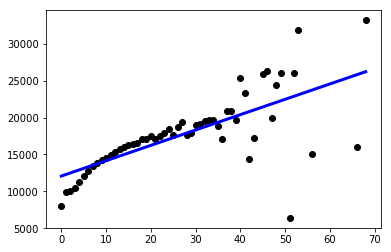

In [35]:
from sklearn import linear_model
%matplotlib inline
# Linear Regression
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, Y)

# Display the attributes we calculated.
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
print('R-Squared:', regr.score(X, Y, sample_weight=None))

# Plot outputs
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

Compare